In [6]:
from sklearn.base import BaseEstimator
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import pandas as pd
import collections as cl
import numpy as np


class HPClassifier(BaseEstimator):
    def __init__(self, n_Samples=None):
        super().__init__()
        self.n_Samples = n_Samples
        self.classifiers = []
        self.frequencies = []

    def fit(self, data, target):
        classifiers = []
        
        self.frequencies = cl.Counter(target)

        for nr_Index in range(self.n_Samples):
            if nr_Index != 0:
                data, target = resample(data, target, random_state=nr_Index-1)

            gaussianClassifier = GaussianNB()
            decisionClassifier = DecisionTreeClassifier()
            knnClassifier = KNeighborsClassifier(n_neighbors=1)

            gaussianClassifier.fit(data, target)
            decisionClassifier.fit(data, target)
            knnClassifier.fit(data, target)

            classifiers.append(gaussianClassifier)
            classifiers.append(decisionClassifier)
            classifiers.append(knnClassifier)

        self.classifiers = classifiers

    def predict(self, data):
        result = []
        predictions = []

        for classifier in self.classifiers:
            prediction = classifier.predict(data)
            predictions.append(prediction)

        dataFrame = pd.DataFrame(data=predictions)
        data = np.asarray(data)

        for index in dataFrame.columns:
            column = dataFrame[index]
            choice = cl.Counter(column).most_common(1)[0][0]
            self.getBetterChoice(column)
            result.append(choice)

        return np.asarray(result)

    def getBetterChoice(self, column):
        frequencies = cl.Counter(column).items()
        betterFrequency = 0
        better = None
        
        for key, value in frequencies:
            if(value > betterFrequency):
                better = key
                betterFrequency = value
            elif(value == betterFrequency):
                for selfKey, selfValue in self.frequencies.most_common():
                    if(selfKey == better):
                        break
                    if(selfKey == key):
                        better = key
                        betterFrequency = value

        return better

In [13]:
from sklearn import datasets
from scipy import stats
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np


def Get_Stats(data, target, classifier, grade={'classifier__n_estimators': [10, 25, 50, 100]}):
    scaler = StandardScaler()

    pipeline = Pipeline([("scaler", scaler), ('classifier', classifier)])

    grade = grade

    gridSearch = GridSearchCV(pipeline, param_grid=grade,
                              scoring='accuracy', cv=4)

    cv = RepeatedStratifiedKFold(
        n_splits=10, n_repeats=3, random_state=36851234)

    scores = cross_val_score(
        gridSearch, data, target, scoring='accuracy', cv=cv, n_jobs=-1)

    mean = scores.mean()
    std = scores.std()
    lower, upper = stats.norm.interval(
        0.95, loc=mean, scale=std / np.sqrt(len(scores)))

    return [scores, mean, std, lower, upper]


def Get_Digits():
    digits = datasets.load_digits()
    target = digits.target
    data = digits.data
    return data, target


def Get_Wine():
    digits = datasets.load_wine()
    target = digits.target
    data = digits.data
    return data, target


def Get_Breast_Cancer():
    digits = datasets.load_breast_cancer()
    target = digits.target
    data = digits.data
    return data, target

def Calculate_Digits_Classifiers():
    data, target = Get_Digits()
    classifier = BaggingClassifier()
    baggingResults = Get_Stats(data, target, classifier)

    data, target = Get_Digits()
    classifier = AdaBoostClassifier()
    adaBoostResults = Get_Stats(data, target, classifier)

    data, target = Get_Digits()
    classifier = RandomForestClassifier()
    randomForestResults = Get_Stats(data, target, classifier)

    data, target = Get_Digits()
    classifier = HPClassifier()
    hpResults = Get_Stats(data, target, classifier, {
                          'classifier__n_Samples': [1, 3, 5, 7]})

    print(baggingResults[1:])
    print(adaBoostResults[1:])
    print(randomForestResults[1:])
    print(hpResults[1:])

    return [baggingResults, adaBoostResults, randomForestResults, hpResults]


def Calculate_Wine_Classifiers():
    data, target = Get_Wine()
    classifier = BaggingClassifier()
    baggingResults = Get_Stats(data, target, classifier)

    data, target = Get_Wine()
    classifier = AdaBoostClassifier()
    adaBoostResults = Get_Stats(data, target, classifier)

    data, target = Get_Wine()
    classifier = RandomForestClassifier()
    randomForestResults = Get_Stats(data, target, classifier)

    data, target = Get_Wine()
    classifier = HPClassifier()
    hpResults = Get_Stats(data, target, classifier, {
                          'classifier__n_Samples': [1, 3, 5, 7]})

    print(baggingResults[1:])
    print(adaBoostResults[1:])
    print(randomForestResults[1:])
    print(hpResults[1:])

    return [baggingResults, adaBoostResults, randomForestResults, hpResults]


def Calculate_Breast_Cancer_Classifiers():
    data, target = Get_Breast_Cancer()
    classifier = BaggingClassifier()
    baggingResults = Get_Stats(data, target, classifier)

    data, target = Get_Breast_Cancer()
    classifier = AdaBoostClassifier()
    adaBoostResults = Get_Stats(data, target, classifier)

    data, target = Get_Breast_Cancer()
    classifier = RandomForestClassifier()
    randomForestResults = Get_Stats(data, target, classifier)

    data, target = Get_Breast_Cancer()
    classifier = HPClassifier()
    hpResults = Get_Stats(data, target, classifier, {
                          'classifier__n_Samples': [1, 3, 5, 7]})

    print(baggingResults[1:])
    print(adaBoostResults[1:])
    print(randomForestResults[1:])
    print(hpResults[1:])

    return [baggingResults, adaBoostResults, randomForestResults, hpResults]


def Get_Accuracies(results):
    accuracies = []

    for item in results:
        accuracies.append(item[0])

    return accuracies


def Get_Boxplot(results, names=["Bagging", "AdaBoost", "Random Forest", "HP"]):
    auxResult = []

    for nr_Index, ds_Name in enumerate(names):
        for result in results[nr_Index]:
            auxResult.append((result, ds_Name))

    data = pd.DataFrame(auxResult, columns=["scores", "names"])

    sns.boxplot(x='names', y='scores', data=data, showmeans=True)


digitsResults = Calculate_Digits_Classifiers()
wineResults = Calculate_Wine_Classifiers()
cancerResults = Calculate_Breast_Cancer_Classifiers()


[0.9545592799503416, 0.012345416175971556, 0.9501416106855818, 0.9589769492151015]
[0.26969170287606037, 0.02239057191729836, 0.26167948684627873, 0.277703918905842]
[0.9762580177943306, 0.009075706850109019, 0.9730103774850689, 0.9795056581035924]
[0.9554872749844818, 0.014216061823307584, 0.9504002160722852, 0.9605743338966785]
[0.9607843137254902, 0.05774859030710892, 0.9401196258084101, 0.9814490016425703]
[0.912309368191721, 0.07433513205888706, 0.8857093716012806, 0.9389093647821615]
[0.9812636165577341, 0.033379579749243, 0.9693191068363171, 0.9932081262791511]
[0.9678649237472765, 0.05036698260765221, 0.9498416616836135, 0.9858881858109395]
[0.9601503759398493, 0.023571364171460867, 0.9517156265928489, 0.9685851252868497]
[0.967784043441938, 0.023573124466449304, 0.9593486641930407, 0.9762194226908354]
[0.9578320802005009, 0.02153201665036922, 0.9501270885818487, 0.9655370718191532]
[0.9548872180451126, 0.025523642668578324, 0.9457538676473226, 0.9640205684429025]


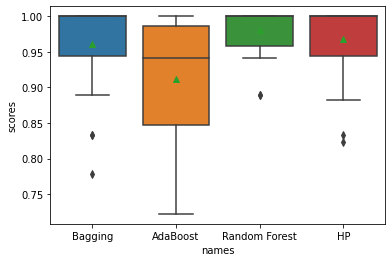

In [15]:
# Get_Boxplot(Get_Accuracies(digitsResults))
Get_Boxplot(Get_Accuracies(wineResults))
# Get_Boxplot(Get_Accuracies(cancerResults))